# Carregando os arquivos movie lens

## Material de estudos :: Aula 01

[Aula 01](https://drive.google.com/open?id=19yDwJOHoRUOFw3wykK8MXZKtONQBB51q)


Iniciando o carregamento dos arquivos via github.


In [0]:
import pandas as pd


In [195]:
filmes = pd.read_csv("https://raw.githubusercontent.com/serginhosue/data-quarantine/master/dataset/ml-latest-small/movies.csv")
filmes.columns = ["filmeId", "titulos", "generos"]
filmes.head()

,filmeId,titulos,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [196]:
avaliacoes = pd.read_csv("https://raw.githubusercontent.com/serginhosue/data-quarantine/master/dataset/ml-latest-small/ratings.csv")
avaliacoes.columns = ["usuarioId","filmeId","nota", "data"]
avaliacoes.head()

,usuarioId,filmeId,nota,data
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [0]:
media_avaliacao_filme = avaliacoes.groupby('filmeId')['nota'].mean()
filmes_com_media = filmes.join(media_avaliacao_filme, on='filmeId' )


In [0]:
total_filmes_sem_avaliacao = filmes_com_media.query(" nota == 'nan' ")

# **Desafio 1 do Paulo Silveira**

O Paulo fez uma análise rápida e disse que tem 18 filmes sem avaliações, será que ele acertou?

Determine quantos filmes não tem avaliações e quais são esses filmes.

**Total de filmes sem avaliações:**

In [199]:
len(total_filmes_sem_avaliacao)

18

**Filmes sem avaliações**


In [200]:
total_filmes_sem_avaliacao

,filmeId,titulos,generos,nota
816,1076,"Innocents, The (1961)",Drama|Horror|Thriller,NaN
2211,2939,Niagara (1953),Drama|Thriller,NaN
2499,3338,For All Mankind (1989),Documentary,NaN
2587,3456,"Color of Paradise, The (Rang-e khoda) (1999)",Drama,NaN
3118,4194,I Know Where I'm Going! (1945),Drama|Romance|War,NaN
4037,5721,"Chosen, The (1981)",Drama,NaN
4506,6668,"Road Home, The (Wo de fu qin mu qin) (1999)",Drama|Romance,NaN
4598,6849,Scrooge (1970),Drama|Fantasy|Musical,NaN
4704,7020,Proof (1991),Comedy|Drama|Romance,NaN
5020,7792,"Parallax View, The (1974)",Thriller,NaN




---


# **Desafio 2 do Guilherme Silveira**

Mudar o nome da coluna nota do dataframe filmes_com_media para nota_média após o join.

In [201]:
filmes_com_media.rename(columns={"nota":"nota_média"}, inplace = True)
filmes_com_media.head()

,filmeId,titulos,generos,nota_média
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


Atributo **"inplace = True"** atrubui o nome da variável direto ao dataframe sem a necessidade de atribuir uma nova variável.

# **Desafio 3 do Guilherme Silveira**

Colocar o número de avaliações por filme, isto é, não só a média mas o TOTAL de votos por filme.



---



In [202]:
total_votos_por_filme = avaliacoes.groupby("filmeId")["nota"].count()
filmes_media_total_votos = filmes_com_media.join(total_votos_por_filme, on = "filmeId")
filmes_media_total_votos.rename(columns={"nota" : "qtd_votos"}, inplace = True)
filmes_media_total_votos.head()

,filmeId,titulos,generos,nota_média,qtd_votos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,215.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818,110.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615,52.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143,7.0
4,5,Father of the Bride Part II (1995),Comedy,3.071429,49.0




---



# **Desafio 4 do Thiago Gonçalves**


Arredondar as médias (coluna de nota média) para duas casas decimais.

In [203]:
filmes_media_total_votos["nota_média"] = filmes_media_total_votos["nota_média"].apply(lambda x: round(x,2))
filmes_media_total_votos.head()

,filmeId,titulos,generos,nota_média,qtd_votos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92,215.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.43,110.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.26,52.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.36,7.0
4,5,Father of the Bride Part II (1995),Comedy,3.07,49.0




---



# **Desafio 5 do Allan Spadini**

Descobrir os generos dos filmes (quais são eles, únicos). (esse aqui o bicho pega)

In [204]:
generos = filmes_media_total_votos["generos"].str.split("|", expand = True).stack().unique()
print(*generos, sep = "\n")

Adventure
Animation
Children
Comedy
Fantasy
Romance
Drama
Action
Crime
Thriller
Horror
Mystery
Sci-Fi
War
Musical
Documentary
IMAX
Western
Film-Noir
(no genres listed)




---



# **Desafio 6 da Thais André**

Contar o número de aparições de cada genero.

In [228]:
generos = filmes_media_total_votos["generos"].str.split("|", expand = True).stack()
qtd_votos_genero = generos.value_counts()
qtd_votos_genero

Drama                 4361
Comedy                3756
Thriller              1894
Action                1828
Romance               1596
Adventure             1263
Crime                 1199
Sci-Fi                 980
Horror                 978
Fantasy                779
Children               664
Animation              611
Mystery                573
Documentary            440
War                    382
Musical                334
Western                167
IMAX                   158
Film-Noir               87
(no genres listed)      34
dtype: int64



---


# **Desafio 7 do Guilherme Silveira**

Plotar o gráfico de aparições de cada genero. Pode ser um gráfico de tipo igual a barra.

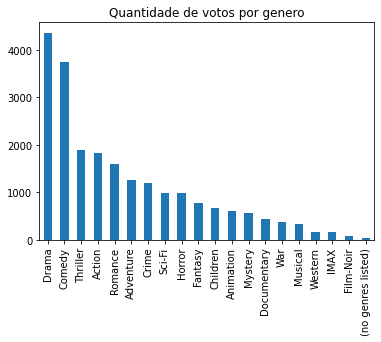

In [230]:
import matplotlib.pyplot as plt

qtd_votos_genero.plot(kind = "bar", title = "Quantidade de votos por genero")
